### Duplicate 7b.ipynb but with env `newfastai`

In [23]:
### Build a Perfect FeatsNet

import os, sys
import copy as copyroot
import pandas as pd
import torch
from IPython.display import display
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

%load_ext autoreload
%autoreload 2
from fastai.basics import *
from fastai.vision.all import *
from fastai.tabular.all import *

from module2.mnist_helpers import build_df, eda_fig_1, build_dls
from module2.mnist_models import FeatsNet
from module2.mnist_metrics import metrics_df


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
# Setup -------------------------------------------

dls_tl = build_dls(target='topleft')
dls_cr = build_dls(target='center')

path = untar_data(URLs.MNIST_TINY)
df = build_df(path)

# df2 - pixel values
df2 = pd.DataFrame([])
for i, row in df.iterrows():    
    img_np = np.array(Image.open(str(path) + row['fn']))
    df2 = pd.concat((df2, pd.Series(img_np.flatten())), axis=1)
df2 = df2.T
df2.reset_index(inplace=True, drop=True)

# df3 - pts features

feats = ['pts11','pts12','pts22']
featsnet = FeatsNet(feats = feats)

# 2*(4 + 16 + 16)
cols =  []
cols += [f'pts11_{i}' for i in range(8)]
cols += [f'pts12_{i}' for i in range(32)]
cols += [f'pts22_{i}' for i in range(32)]

df3 = pd.DataFrame([])
for i, row in df.iterrows():    
    img_np = np.array(Image.open(str(path) + row['fn']))
    tmp = featsnet.build_feats(
                torch.tensor(img_np).unsqueeze(0)
                ).squeeze(0).tolist()
    df3 = pd.concat((df3, pd.Series(tmp)), axis=1)
df3 = df3.T
df3.reset_index(inplace=True, drop=True)
df3.columns = cols

y_names = ['scalar_pxsum', 'point_topleft_x', 'point_topleft_y',
          'point_center_x', 'point_center_y']

df2_y = df[y_names]
df2 = pd.concat((df2, df3, df2_y), axis=1)

df2.head(2)

y_cols = y_names
x_cols = [col for col in df2.columns if col not in y_cols]

X = df2[x_cols]
Y = df2[y_cols]

y_tlx, y_tly, y_crx, y_cry = [Y.iloc[:,i] for i in range(1,5)]

Xt, Xv, yt_tlx, yv_tlx = train_test_split(X,  y_tlx, random_state=0)
_,  _,  yt_tly, yv_tly = train_test_split(X,  y_tly, random_state=0)
_,  _,  yt_crx, yv_crx = train_test_split(X,  y_crx, random_state=0)
_,  _,  yt_cry, yv_cry = train_test_split(X,  y_cry, random_state=0)

### Setup Tabular Dls

In [76]:
Y

,scalar_pxsum,point_topleft_x,point_topleft_y,point_center_x,point_center_y
0,35867,11,5,15,14
1,29717,9,4,14,13
2,25121,12,3,13,12
3,22035,13,4,14,12
4,43085,5,4,14,14
...,...,...,...,...,...
704,24114,17,7,17,14
705,23495,5,7,17,13
706,23510,9,7,17,14
707,24630,3,8,17,13


In [75]:
df2

,0,1,2,3,4,5,6,7,8,9,...,pts22_27,pts22_28,pts22_29,pts22_30,pts22_31,scalar_pxsum,point_topleft_x,point_topleft_y,point_center_x,point_center_y
0,0,0,0,0,0,0,0,0,0,0,...,0.428571,0.214286,0.392857,0.214286,0.214286,35867,11,5,15,14
1,0,0,0,0,0,0,0,0,0,0,...,0.607143,0.642857,0.321429,0.642857,0.464286,29717,9,4,14,13
2,0,0,0,0,0,0,0,0,0,0,...,0.535714,0.178571,0.428571,0.178571,0.214286,25121,12,3,13,12
3,0,0,0,0,0,0,0,0,0,0,...,0.500000,0.178571,0.464286,0.178571,0.178571,22035,13,4,14,12
4,0,0,0,0,0,0,0,0,0,0,...,0.642857,0.535714,0.178571,0.535714,0.178571,43085,5,4,14,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,0,0,0,0,0,0,0,0,0,0,...,0.357143,0.250000,0.607143,0.250000,0.285714,24114,17,7,17,14
705,0,0,0,0,0,0,0,0,0,0,...,0.535714,0.357143,0.178571,0.357143,0.428571,23495,5,7,17,13
706,0,0,0,0,0,0,0,0,0,0,...,0.464286,0.250000,0.321429,0.250000,0.285714,23510,9,7,17,14
707,0,0,0,0,0,0,0,0,0,0,...,0.571429,0.285714,0.107143,0.285714,0.500000,24630,3,8,17,13


In [39]:
data = pd.concat((X, y_tlx, y_tly), axis=1)

y_tmp = y_tlx.copy()
y_tmp = (y_tmp - 14) / 14
y_tmp2 = y_tly.copy()
y_tmp2 = (y_tmp2 -14) / 14

# pts_cols = [e for e in X.columns if 'pts' in str(e)]
pts_cols = [
    "pts22_5",
    "pts22_29",
    "pts22_21",
    "pts11_0",
    "pts12_4",
    "pts11_2",
]

data = pd.concat((X.loc[:, pts_cols], y_tmp, y_tmp2), axis=1)

print(data.shape)

(709, 8)


In [40]:
data.head(2)

,pts22_5,pts22_29,pts22_21,pts11_0,pts12_4,pts11_2,point_topleft_x,point_topleft_y
0,0.392857,0.392857,0.392857,0.178571,0.178571,0.178571,-0.214286,-0.642857
1,0.321429,0.321429,0.321429,0.142857,0.142857,0.142857,-0.357143,-0.714286


### Do Scaling

In [41]:
from sklearn.preprocessing import Normalizer, StandardScaler

In [49]:
ss = StandardScaler()
ss.fit(data[cols])
data[cols] = ss.transform(data[cols])

In [50]:
data.mean()

pts22_5            3.532642e-01
pts22_29           3.532642e-01
pts22_21           3.532642e-01
pts11_0            2.059238e-01
pts12_4            2.059238e-01
pts11_2            2.059238e-01
point_topleft_x    6.067862e-16
point_topleft_y    2.901613e-16
dtype: float64

In [51]:
dls = TabularDataLoaders.from_df(data, 
                                 path='.', 
                                 y_names=['point_topleft_x',
                                          'point_topleft_y'],
#                                  y_names='point_topleft_x', 
                                 procs=[Normalize])


ret = dls.one_batch()

ret[0].shape, ret[1].shape, ret[2].shape

(torch.Size([64, 0]), torch.Size([64, 6]), torch.Size([64, 2]))

In [53]:
learn = tabular_learner(dls,)

In [54]:
learn.fit(40)

epoch,train_loss,valid_loss,time
0,0.333093,0.206269,00:00
1,0.215162,0.177634,00:00
2,0.153481,0.193270,00:00
3,0.122211,0.041952,00:00
4,0.096154,0.017130,00:00
5,0.078850,0.011833,00:00
6,0.067013,0.007737,00:00
7,0.058796,0.002563,00:00
8,0.052852,0.005392,00:00
9,0.045560,0.003739,00:00


In [55]:
metrics_df(learn, "","","")

,model,details,target,split,mse,mae,r2,dist_avg,dist_r2,sqdist_avg,sqdist_r2
0,,,,valid,0.002023,0.035551,0.997879,0.055513,0.955917,0.004046,0.997945
1,,,,train,0.001943,0.035693,0.998073,0.055013,0.957325,0.003887,0.998064


In [56]:
preds = learn.get_preds()

In [57]:
r2_score(preds[1], preds[0])

0.997879366420017

In [58]:
mse(preds[1], preds[0])

tensor(0.0020)

### Un-Scale, examine perf

In [63]:
dls.y_names

(#2) ['point_topleft_x','point_topleft_y']

In [69]:
actual_inv = ss.inverse_transform(preds[1])
pred_inv   = ss.inverse_transform(preds[0])
mse(torch.tensor(actual_inv), torch.tensor(pred_inv))

tensor(6.5916e-05)

In [70]:
r2_score(actual_inv, pred_inv)

0.9978793644292128

### Plot PvA for scaled and unscaled Y

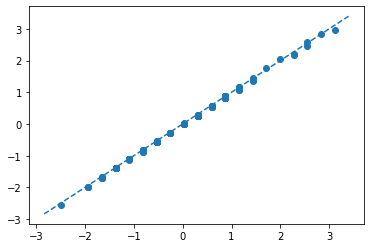

In [71]:
plt.scatter(preds[1].view(-1,2)[:,0], preds[0][:,0], )
tmp = torch.tensor((plt.xlim(), plt.ylim())).flatten()
lo, hi = tmp.min().item(), tmp.max().item()
plt.plot([lo,hi],[lo,hi], linestyle='--');

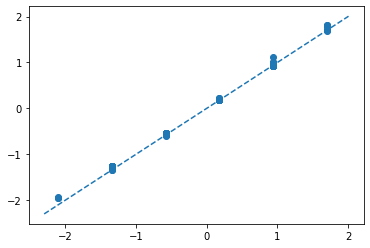

In [72]:
plt.scatter(preds[1].view(-1,2)[:,1], preds[0][:,1], )
tmp = torch.tensor((plt.xlim(), plt.ylim())).flatten()
lo, hi = tmp.min().item(), tmp.max().item()
plt.plot([lo,hi],[lo,hi], linestyle='--');

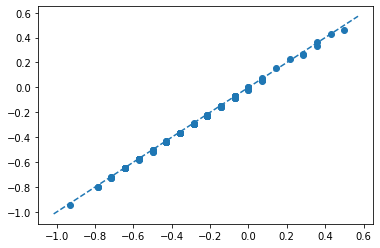

In [73]:
plt.scatter(actual_inv[:,0], pred_inv[:,0], )
tmp = torch.tensor((plt.xlim(), plt.ylim())).flatten()
lo, hi = tmp.min().item(), tmp.max().item()
plt.plot([lo,hi],[lo,hi], linestyle='--');

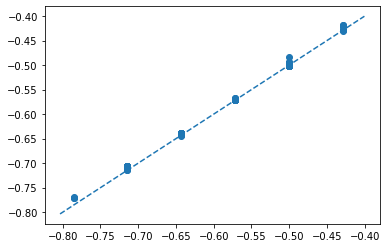

In [74]:
plt.scatter(actual_inv[:,1], pred_inv[:,1], )
tmp = torch.tensor((plt.xlim(), plt.ylim())).flatten()
lo, hi = tmp.min().item(), tmp.max().item()
plt.plot([lo,hi],[lo,hi], linestyle='--');